In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/House_Price_Prediction/data/raw/Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


**Treating Outliers using IQR method**


In [ ]:
def cap_price_area(df):
    df = df.copy()

    for col in ['price', 'area']:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        df[col] = np.where(
            df[col] < lower, lower,
            np.where(df[col] > upper, upper, df[col])
        )

    return df

df = cap_price_area(df)


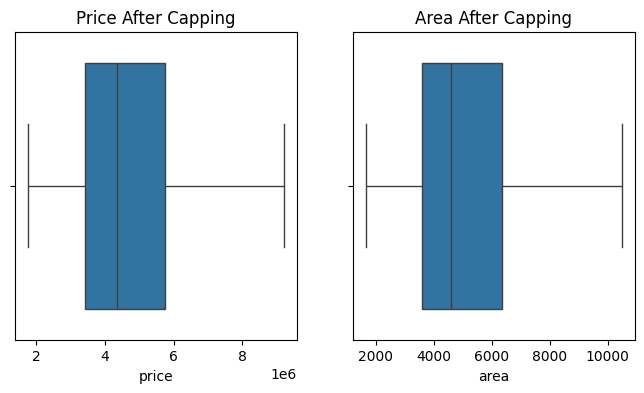

In [ ]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
sns.boxplot(x=df['price'])
plt.title("Price After Capping")

plt.subplot(1,2,2)
sns.boxplot(x=df['area'])
plt.title("Area After Capping")

plt.show()

**Encoding**

In [ ]:
binary_cols = [
    'mainroad', 'guestroom', 'basement',
    'hotwaterheating', 'airconditioning', 'prefarea'
]

df[binary_cols] = df[binary_cols].replace({'yes': 1, 'no': 0})

/tmp/ipython-input-4228746543.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({'yes': 1, 'no': 0})


In [ ]:
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,9205000.0,7420.0,4,2,3,1,0,0,0,1,2,1,False,False
1,9205000.0,8960.0,4,4,4,1,0,0,0,1,3,0,False,False
2,9205000.0,9960.0,3,2,2,1,0,1,0,0,2,1,True,False
3,9205000.0,7500.0,4,2,2,1,0,1,0,1,3,1,False,False
4,9205000.0,7420.0,4,1,2,1,1,1,0,1,2,0,False,False


In [ ]:
X = df.drop("price", axis=1)
y = df["price"]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [ ]:
clean_train_df = pd.DataFrame(X_train_scaled,columns=X.columns)
clean_train_df["price"] = y_train.values


In [ ]:
clean_test_df = pd.DataFrame(X_test_scaled,columns=X.columns)
clean_test_df["price"] = y_test.values


In [ ]:
clean_train_df.to_csv(
    "/content/drive/MyDrive/Colab Notebooks/House_Price_Prediction/data/processed/clean_train_df.csv",
    index=False
)

clean_test_df.to_csv(
    "/content/drive/MyDrive/Colab Notebooks/House_Price_Prediction/data/processed/clean_test_df.csv",
    index=False
)
